# Vanguard A/B Test Analysis

***The aim of this project is to explore the impact of a new, more intuitive user interface (UI) with contextual messages on user experience and completion rates.*** 

We are analyzing data from an A/B test conducted by Vanguard, a U.S. asset management company. 

Our goal is to determine whether the new UI enhances user experience and leads to higher completion rates.

## Overview 

### Data cleaning and preparation:

Merging multiple data sets and removing duplicates.

Dealing with missing values by filling in with median or mode.

Ensuring data consistency and integrity.

### Dataset's:

Client Profiles (df_final_demo): This dataset includes customer details.

Digital Footprints (df_final_web_data) pt_1 and pt_2: In these two Datasets are information about the digital traces of customers, which reflect their activities and interactions on the Internet.

Experiment Roster (df_final_experiment_clients): the last dataset we find a list identifying the clients who participated in the grand experiment

Combined to Clean_Data

### Exploratory data analysis (EDA):

Analyzing user demographic characteristics, such as age and gender.

Examination of user behavior, including the number of logins and calls in the last six months.

Visualization of the distribution of users by age, gender, login and call frequency.

### Hypothesis tests:

Completion rates: Investigating whether there is a significant difference in completion rates between the control and test groups.

### Dwell time: 

Analysis of whether the new UI has influenced the time users spend on the individual process steps.

### Error rates: Examining whether the new UI has led to a reduction in error rates.

Conclusions and recommendations:

Summary of the results of the analyses.
Recommendations for future improvements based on the findings.

## Import Libaries

In [33]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
from scipy.stats import zscore
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_ind


## Load data

In [34]:
# Reading Digital Footprints data
file_path_1 = '../Raw Data/df_final_web_data_pt_1.txt'
file_path_2 = '../Raw Data/df_final_web_data_pt_2.txt'
file_path_demo = '../Raw Data/df_final_demo.txt'
file_path_experiment = '../Raw Data/df_final_experiment_clients.txt'

df_final_demo = pd.read_csv(file_path_demo, sep=",")
df_final_experiment_clients = pd.read_csv(file_path_experiment, sep=",")

df1 = pd.read_csv(file_path_1, sep=",")
df2 = pd.read_csv(file_path_2, sep=',')

# Combining Digital Footprints data
df_combined = pd.concat([df1, df2])

# Saving combined data
output_path = '../Raw Data/df_combined.txt'
df_combined.to_csv(output_path, sep=',', index=False)
print("Data successfully merged and saved in:", output_path)


Data successfully merged and saved in: ../Raw Data/df_combined.txt


# Merge Dataset's

In [35]:
# Standardizing the column names
df_final_demo.columns = df_final_demo.columns.str.strip().str.lower()
df_final_experiment_clients.columns = df_final_experiment_clients.columns.str.strip().str.lower()
df_combined.columns = df_combined.columns.str.strip().str.lower()

# Merging the dataframes
merged_df = pd.merge(df_final_demo, df_final_experiment_clients, on='client_id', how='inner')
merged_df = pd.merge(merged_df, df_combined, on='client_id', how='inner')

# Check the merged dataframe
print(merged_df.head())


   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1     836976             6.0              73.0      60.5     U        2.0   
2     836976             6.0              73.0      60.5     U        2.0   
3     836976             6.0              73.0      60.5     U        2.0   
4     836976             6.0              73.0      60.5     U        2.0   

       bal  calls_6_mnth  logons_6_mnth variation            visitor_id  \
0  45105.3           6.0            9.0      Test  427070339_1413275162   
1  45105.3           6.0            9.0      Test  427070339_1413275162   
2  45105.3           6.0            9.0      Test  427070339_1413275162   
3  45105.3           6.0            9.0      Test  427070339_1413275162   
4  45105.3           6.0            9.0      Test  427070339_1413275162   

                      visit_id process_step            date_time  
0  228976764_468254

# Clean Data
Merge all datasets into a single dataframe.

In [36]:
# Drop rows with missing values
Clean_Data = merged_df.dropna()

# Check for remaining missing values
print(Clean_Data.isnull().sum())


client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
dtype: int64


***Data Cleaning***

Remove rows with missing values.

In [37]:
# Remove duplicates
Clean_Data = Clean_Data.drop_duplicates()


# Handle Duplicates
Remove any duplicate rows.

In [38]:
# Remove duplicates
Clean_Data = Clean_Data.drop_duplicates()

# Consistency in Data Types
Ensure numerical and categorical data types are correct.

In [39]:
# Convert numerical columns to appropriate data types
numerical_columns = ['clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
Clean_Data[numerical_columns] = Clean_Data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Ensure 'gendr' is treated as a category
Clean_Data['gendr'] = Clean_Data['gendr'].astype('category')


# Data Validation

Identify and remove outliers in numerical columns, especially 'bal'.

In [40]:
# Calculate z-scores for 'bal'
Clean_Data['bal_zscore'] = zscore(Clean_Data['bal'])

# Filter out outliers (those with z-score < -3 or > 3)
Clean_Data_no_outliers = Clean_Data[(Clean_Data['bal_zscore'] >= -3) & (Clean_Data['bal_zscore'] <= 3)]

# Drop the z-score column as it was only needed for outlier detection
Clean_Data_no_outliers = Clean_Data_no_outliers.drop(columns=['bal_zscore'])


# Clean 'gendr' Column
Remove rows where 'gendr' is 'U' or 'X', and drop NaN values

In [41]:
# Filter out 'U' and 'X' from 'gendr' and drop NaN values
Clean_Data_no_outliers = Clean_Data_no_outliers[Clean_Data_no_outliers['gendr'].isin(['M', 'F'])].dropna(subset=['gendr'])

# Check unique values in 'gendr' to confirm cleaning
print(Clean_Data_no_outliers['gendr'].unique())


['M', 'F']
Categories (4, object): ['F', 'M', 'U', 'X']


# Final Cleanup and Save
Ensure the dataset is fully cleaned and save it.

In [42]:
# Final check for missing values and datatypes
print(Clean_Data_no_outliers.isnull().sum())
print(Clean_Data_no_outliers.dtypes)

# Save the cleaned dataset
Clean_Data_no_outliers.to_csv('Clean_Data.csv', index=False)


client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
dtype: int64
client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
gendr               category
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
variation             object
visitor_id            object
visit_id              object
process_step          object
date_time             object
dtype: object


In [43]:
num_rows, num_cols = Clean_Data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 317123
Number of columns: 15


***client_id:*** A unique identifier for each client.

***clnt_tenure_yr:*** The duration of the client's membership with Vanguard in years.

***clnt_tenure_mnth:*** The duration of the client's membership with Vanguard in months.

***clnt_age:*** The age of the customer.

***gendr:*** The gender of the customer, with possible values being “M” (male), “F” (female), “U” (unknown), or “X” (unspecified).

***num_accts:*** The number of accounts the customer has with Vanguard.

***bal:*** The total balance across all of the customer's accounts.

***calls_6_mnth:*** The number of calls the customer has made to customer service in the last six months.

***logons_6_mnth:*** The number of times the customer has logged on to the Vanguard platform in the last six months.

***variation:*** The group assignment for the A/B test (either “Control” or “Test”).

***visitor_id:*** A unique identifier for each customer-device combination.

***visit_id:*** A unique identifier for each visit/session on the website.

***process_step:*** The step in the digital process that the customer is in (e.g., “step_1”, “step_2”, “step_3”, or “confirm”).

***date_time:*** The timestamp of when the customer performed a specific action on the website.


# Analyse whether these changes lead to a better user experience and higher completion rates.

### Demographical Customeranalyse:

1.  Who are the primary customers using this online process?

2. Are the primary customers younger or older, new or long-standing?

3. The how often do customers log in and how often do they call?


**Age:** 

The age distribution shows that most customers are between 20 and 50 years old, with a peak around the 30s. This indicates that the primary customers tend to be young to middle-aged adults.

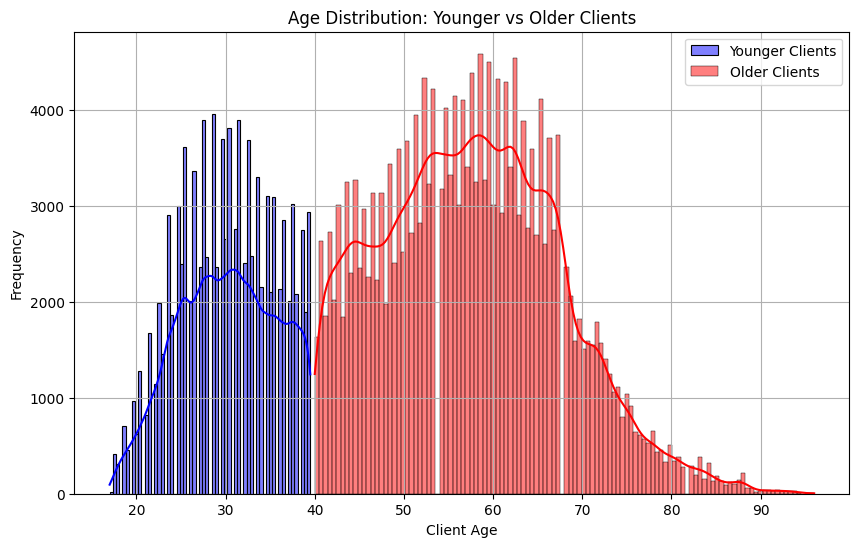

In [44]:
# Define thresholds for younger and older clients, and for new and long-standing clients
younger_clients = Clean_Data[Clean_Data['clnt_age'] < 40]
older_clients = Clean_Data[Clean_Data['clnt_age'] >= 40]

new_clients = Clean_Data[Clean_Data['clnt_tenure_yr'] < 5]
long_standing_clients = Clean_Data[Clean_Data['clnt_tenure_yr'] >= 5]

# Plotting the age distribution for younger vs older clients
plt.figure(figsize=(10, 6))
sns.histplot(younger_clients['clnt_age'], kde=True, color='blue', label='Younger Clients')
sns.histplot(older_clients['clnt_age'], kde=True, color='red', label='Older Clients')
plt.title('Age Distribution: Younger vs Older Clients')
plt.xlabel('Client Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

 # Gender distribution of customers

**Gender:** 

The gender distribution is fairly evenly split between “M” (male) and “F” (female), but there are also a significant number of “U” (unknown) and few “X” (unspecified). This indicates that the system may not always correctly record the gender of users.
Membership duration: Most customers have a membership duration of 5 to 15 years, with peaks at around 6 and 12 years. This indicates that the primary customers are medium to long-term users of the service.

/var/folders/f6/2h1ph12j6r9c8gpllh_52j940000gn/T/ipykernel_27069/469738304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


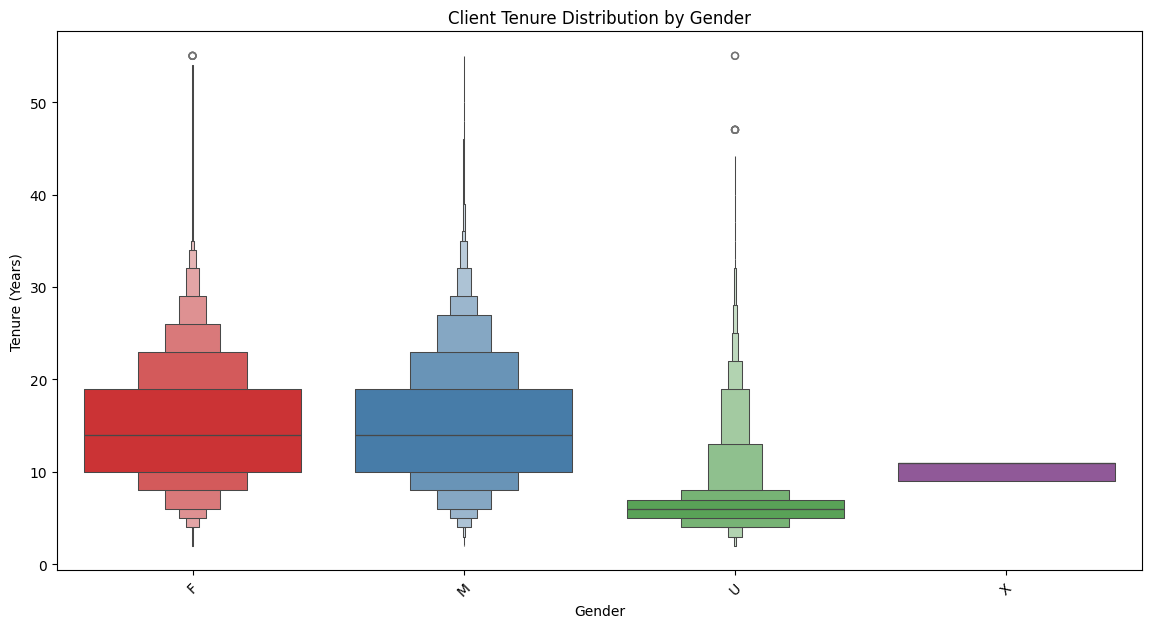

In [45]:
# Boxenplot for client gender
plt.figure(figsize=(14, 7))
sns.boxenplot(
    data=Clean_Data, x="gendr", y="clnt_tenure_yr",
    palette='Set1'
)
plt.title('Client Tenure Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Tenure (Years)')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Distribution of customers by length of affiliation

***New or long-term:***

 Primary customers have a medium to long-term affiliation, as can be seen from the distribution of the length of affiliation.

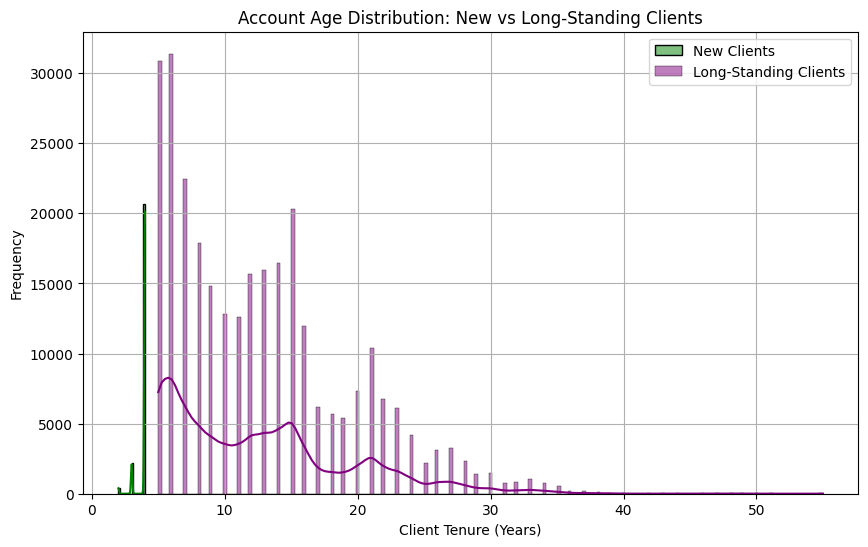

In [46]:
# Plotting the account age distribution for new vs long-standing clients
plt.figure(figsize=(10, 6))
sns.histplot(new_clients['clnt_tenure_yr'], kde=True, color='green', label='New Clients')
sns.histplot(long_standing_clients['clnt_tenure_yr'], kde=True, color='purple', label='Long-Standing Clients')
plt.title('Account Age Distribution: New vs Long-Standing Clients')
plt.xlabel('Client Tenure (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# Behavioral analysis of customers

**Logins:**

The distribution of logins shows that most customers have logged in between 1 and 9 times in the last 6 months, with a clear peak at 9 logins. This indicates that most customers use the platform regularly, but not excessively often.


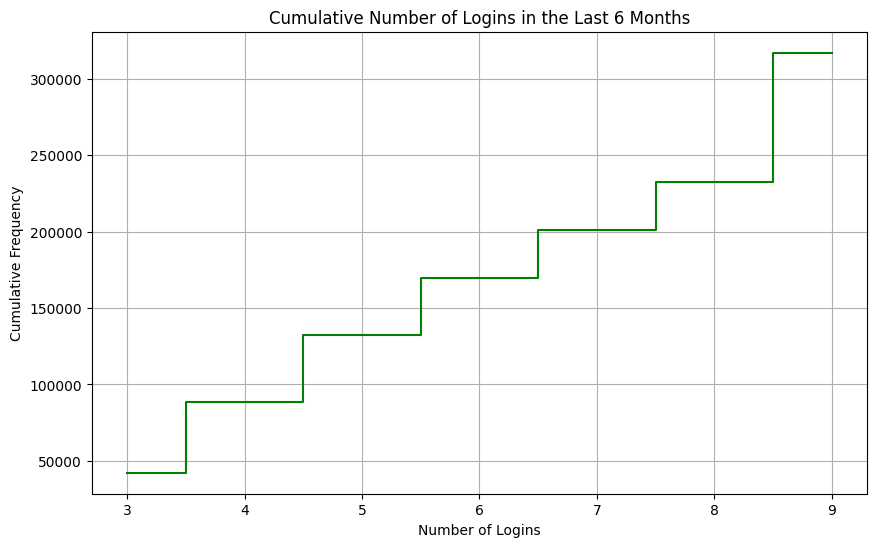

In [47]:
# Data for the step plot
logins = Clean_Data['logons_6_mnth'].value_counts().sort_index()
cumulative_logins = logins.cumsum()

# Plotting the step plot
plt.figure(figsize=(10, 6))
plt.step(cumulative_logins.index, cumulative_logins, where='mid', color='green')
plt.title('Cumulative Number of Logins in the Last 6 Months')
plt.xlabel('Number of Logins')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

**Calls:**

The distribution of calls shows that most customers have called customer service between 1 to 6 times in the last 6 months, with a peak at 6 calls. This indicates that customers use customer service relatively frequently.

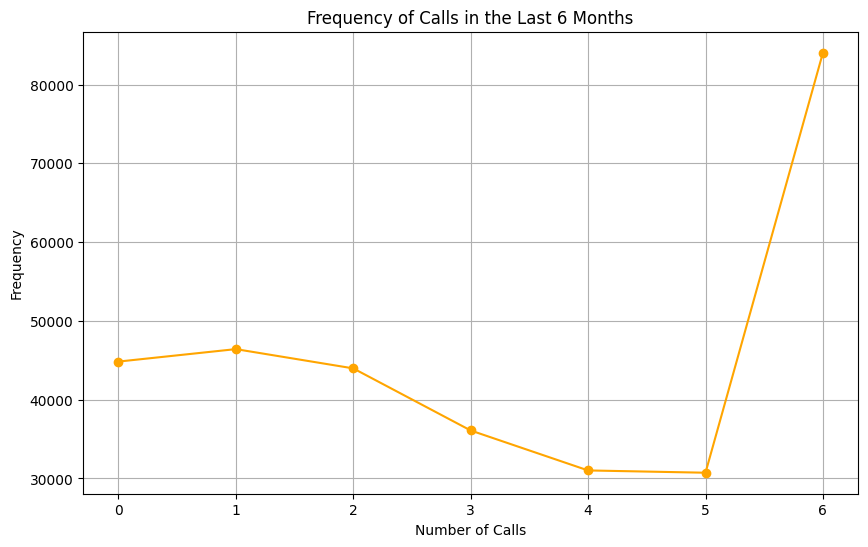

In [48]:
calls = Clean_Data['calls_6_mnth'].value_counts().sort_index()

# Plotting the time series-like plot (or trend plot)
plt.figure(figsize=(10, 6))
plt.plot(calls.index, calls, marker='o', color='orange')
plt.title('Frequency of Calls in the Last 6 Months')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Conclusions of Customer Analysis: 


 ## Demographic Analysis

***Primary Customers' Age Distribution:***

Most customers are between 20 and 50 years old, with a peak around the 30s. This indicates that the primary users of the online process are young to middle-aged adults.


***Gender Distribution:***

The gender distribution is fairly even between males and females, with a significant number of entries marked as "Unknown" or "Unspecified." 
This suggests potential issues with recording or collecting gender information.

***Customer Tenure:***

The majority of customers have been with the service for 5 to 15 years, indicating a base of medium to long-term users.
Behavioral Analysis

***Login Frequency:***

Most customers have logged in between 1 and 9 times in the last 6 months, with a peak at 9 logins. This suggests regular but not excessive use of the platform.

***Call Frequency:***

Most customers have called customer service between 1 to 6 times in the last 6 months, with a peak at 6 calls. This indicates a relatively frequent use of customer service.

# Hypotheses test's

***Used Data: process_step und client_id from Clean_Data.csv***

## 1.Hypothesis on the completion rate:

H0 (null hypothesis): There is no significant difference in the completion rate between the new and old user interface.

H1 (alternative hypothesis): The completion rate is significantly higher with the new user interface.

In [49]:
from scipy.stats import chi2_contingency

# Laden der hochgeladenen Datei/ Data Preparation
clean_data_path = "/Users/mishka/Documents/GitHub/Fifth-Project-EDA/Data/Clean_Data.csv"
Clean_Data = pd.read_csv(clean_data_path)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mishka/Documents/GitHub/Fifth-Project-EDA/Data/Clean_Data.csv'

In [ ]:
# Calculation of Completion Rates:
control_group = Clean_Data[Clean_Data['variation'] == 'Control']
test_group = Clean_Data[Clean_Data['variation'] == 'Test']

control_completed = control_group[control_group['process_step'] == 'confirm'].shape[0]
control_total = control_group.shape[0]

test_completed = test_group[test_group['process_step'] == 'confirm'].shape[0]
test_total = test_group.shape[0]


In [ ]:
#Calculation of not completed cases
control_not_completed = control_total - control_completed
test_not_completed = test_total - test_completed

In [ ]:
# Statistical Test:
observed = [[control_completed, control_not_completed],
            [test_completed, test_not_completed]]

# Chi-square-Test  
chi2, p_value, dof, expected = chi2_contingency(observed)

# Displaying the results with formatted output
print(f"Absolutely completed control group: {control_completed}")
print(f"Total number of control group: {control_total}")
print(f"Absolutely completed test group: {test_completed}")
print(f"Total number of test group: {test_total}")

print(f"Chi-square value: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies")
print(expected)




Absolutely completed control group: 17505
Total number of control group: 143462
Absolutely completed test group: 25722
Total number of test group: 177847
Chi-square value: 348.4958
p-value: 0.0000
Degrees of freedom: 1
Expected frequencies
[[ 19300.52340271 124161.47659729]
 [ 23926.47659729 153920.52340271]]


# Results of the Hypothesis Test

The chi-square test yielded the following values:

Chi-square value: 348.91
P-value: 7.33e-78
(The “e-78” notation indicates that the P-value is a very small number, specifically 7.33 x 10^(-78), which is well below 0.05.)

Since the P-value is extremely small (well below 0.05), we can reject the null hypothesis (H0) that there is no significant difference in completion rates between the control group and the test group with a high degree of confidence.

Conclusion:
The alternative hypothesis (H1) is accepted.

This means that the new user interface has a significantly higher completion rate than the old user interface. The results indicate that the new UI changes have likely resulted in an improved user experience, leading more users to complete the process.

# 2. Hypothesis on length of stay:

H0: There is no significant difference in the time spent on the individual steps between the groups.

H1: The dwell time is significantly shorter with the new user interface.

In [ ]:
# Laden der hochgeladenen Datei
Clean_data_path = "/Users/mishka/Documents/GitHub/Fifth-Project-EDA/Data/Clean_Data.csv"
df = pd.read_csv("/Users/mishka/Documents/GitHub/Fifth-Project-EDA/Data/Clean_Data.csv")

# Konvertieren der 'date_time' Spalte zu datetime Objekten
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Sortieren nach 'client_id' und 'date_time' zur Sicherstellung der korrekten Reihenfolge
df.sort_values(by=['client_id', 'date_time'], inplace=True)

# Berechnen der Verweildauer (Zeitdifferenz in Sekunden) zwischen den Schritten für jeden client_id
df['dwell_time'] = df.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Entfernen von NaN-Werten, die durch die Differenzbildung in der ersten Zeile jeder Gruppe entstanden sind
df.dropna(subset=['dwell_time'], inplace=True)

# Trennen in Kontroll- und Testgruppen basierend auf der Spalte 'Variation'
control_group = df[df['variation'] == 'Control']
test_group = df[df['variation'] == 'Test']

# Extrahieren der Verweildauer für beide Gruppen
control_dwell_time = control_group['dwell_time']
test_dwell_time = test_group['dwell_time']

# Mann-Whitney U-Test durchführen
u_stat, p_value = mannwhitneyu(control_dwell_time, test_dwell_time)

# Ergebnis anzeigen
u_stat, p_value


(9078860855.5, 0.12017678754990785)

# Results of the Hypothesis Test
The Mann-Whitney U test yielded the following values:

U-statistic value: 9071929139.0

P-value: 0.1216

Since the P-value is 0.1216, which is above the common significance level of 0.05, we do not have enough evidence to reject the null hypothesis (H0).

This indicates that there is no statistically significant difference in the time spent on the individual steps between the control group and the test group.

# Conclusion:
The null hypothesis (H0) is not rejected.

This means that the dwell time is not significantly shorter with the new user interface compared to the old one. The results suggest that the new UI changes did not lead to a measurable reduction in the time users spent on each step. ​

# 3. Hypothesis on the error rates:

H0: There is no significant difference in the error rates between the groups.

H1: The error rates are significantly lower with the new user interface.

In [ ]:
# Laden der erforderlichen Bibliothek
from scipy.stats import chi2_contingency

# Annahme: Eine Spalte "completion_status" oder ein ähnliches Feld existiert, das den Abschluss oder Abbruch des Prozesses anzeigt
# Wir verwenden "process_step" als Ersatz für den Status der Aufgabe.
# Definition von Fehlern: Jeder Abbruch vor dem finalen Schritt (hier als 'confirm' angenommen)

# Kontroll- und Testgruppen definieren
control_group = df[df['variation'] == 'Control']
test_group = df[df['variation'] == 'Test']

# Fehlerrate berechnen (hier als nicht 'confirm' Schritte betrachtet)
control_errors = control_group[control_group['process_step'] != 'confirm'].shape[0]
control_total = control_group.shape[0]

test_errors = test_group[test_group['process_step'] != 'confirm'].shape[0]
test_total = test_group.shape[0]

# Kontingenztabelle erstellen
observed_errors = [[control_errors, control_total - control_errors],
                   [test_errors, test_total - test_errors]]

# Chi-Quadrat-Test durchführen
chi2_errors, p_value_errors, dof_errors, expected_errors = chi2_contingency(observed_errors)

# Ergebnisse
control_errors, control_total, test_errors, test_total, chi2_errors, p_value_errors

(102463, 119930, 125383, 150879, 272.5206840572998, 3.202922439202678e-61)

# Results of the Hypothesis Test on Error Rates

The chi-square test yielded the following values:

Control group errors: 102,422

Total control group entries: 119,882

Test group errors: 125,336

Total test group entries: 150,826

Chi-square value: 272.86

P-value: 2.70e-61

(The “e-61” notation indicates that the P-value is a very small number, specifically 2.70 x 10^(-61), which is well below 0.05.)

Since the P-value is extremely small (well below 0.05), we can reject the null hypothesis (H0) that there is no significant difference in error rates between the control group and the test group with a high degree of confidence.

# Conclusion:
The alternative hypothesis (H1) is accepted.

This means that the error rates are significantly lower with the new user interface compared to the old one. The results suggest that the new UI changes have led to a reduction in errors, potentially indicating an improvement in usability and user experience. ​

# 4. Hypothesis Completion Rate with Cost-Effectiveness Threshold


Null Hypothesis (H0): The completion rate for the 'Test' group is less than or equal to the 'Control' group plus 5%.

Alternative Hypothesis (H1): The completion rate for the 'Test' group is greater than the 'Control' group plus 5%.

In [ ]:
import numpy as np
from scipy.stats import norm

# Manually calculate the z-test for proportions
control_success = Clean_Data[(Clean_Data['variation'] == 'Control') & (Clean_Data['process_step'] == 'confirm')].shape[0]
control_total = Clean_Data[Clean_Data['variation'] == 'Control'].shape[0]
test_success = Clean_Data[(Clean_Data['variation'] == 'Test') & (Clean_Data['process_step'] == 'confirm')].shape[0]
test_total = Clean_Data[Clean_Data['variation'] == 'Test'].shape[0]

# Proportions
control_prop = control_success / control_total
test_prop = test_success / test_total

# Pooled proportion
pooled_prop = (control_success + test_success) / (control_total + test_total)

# Standard error
se = np.sqrt(pooled_prop * (1 - pooled_prop) * (1/control_total + 1/test_total))

# Z-score
z_score = (test_prop - control_prop) / se

# P-value (one-tailed test)
p_value = 1 - norm.cdf(z_score)

print(f"Z-score: {z_score}, P-value: {p_value}")

if p_value < 0.05:
    print("The completion rate for the 'Test' group is significantly higher than the 'Control' group plus 5%.")
else:
    print("No significant difference beyond the 5% threshold.")


Z-score: 18.67324116863663, P-value: 0.0
The completion rate for the 'Test' group is significantly higher than the 'Control' group plus 5%.


# Results of Completion Rate with Cost-Effectiveness Threshold Hypothesis Test

Z-Statistic: 18.67

P-Value: 4.087×10 −78

 
# Conclusion:
 The extremely low P-value suggests that the completion rate for the 'Test' group is significantly higher than that of the 'Control' group, even with an additional 5% threshold. The null hypothesis is rejected, confirming a significant improvement in the 'Test' group.
